In [25]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Set random seed
np.random.seed(42)
n_samples = 500


In [29]:
# Simulate client financial and preference data
data = pd.DataFrame({
    "age": np.random.randint(25, 70, n_samples),
    "income": np.random.normal(75000, 25000, n_samples).astype(int),
    "investment_amount": np.random.normal(50000, 15000, n_samples).astype(int),
    "risk_tolerance": np.random.choice(["Low", "Medium", "High"], size=n_samples, p=[0.3, 0.5, 0.2]),
    "investment_horizon_years": np.random.randint(1, 30, n_samples),
})


In [31]:
# Define rule-based target (portfolio strategy)
def assign_strategy(row):
    if row['risk_tolerance'] == "High" and row['investment_horizon_years'] > 10:
        return "Aggressive"
    elif row['risk_tolerance'] == "Low" or row['age'] > 60:
        return "Conservative"
    else:
        return "Balanced"


In [33]:
# Apply strategy
data['portfolio_strategy'] = data.apply(assign_strategy, axis=1)


In [35]:
# Encode categorical input
le_risk = LabelEncoder()
data['risk_tolerance_encoded'] = le_risk.fit_transform(data['risk_tolerance'])


In [37]:
# Define features and target
X = data[["age", "income", "investment_amount", "risk_tolerance_encoded", "investment_horizon_years"]]
y = data["portfolio_strategy"]

# Encode target labels
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

In [39]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [41]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, stratify=y_encoded)


In [43]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [45]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))


Classification Report:

              precision    recall  f1-score   support

  Aggressive       1.00      1.00      1.00        11
    Balanced       1.00      1.00      1.00        46
Conservative       1.00      1.00      1.00        43

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



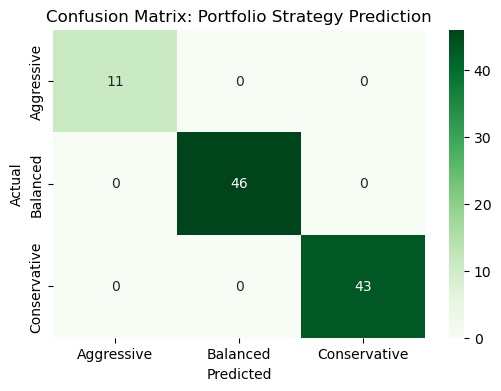

In [47]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=le_target.classes_, yticklabels=le_target.classes_, cmap="Greens")
plt.title("Confusion Matrix: Portfolio Strategy Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


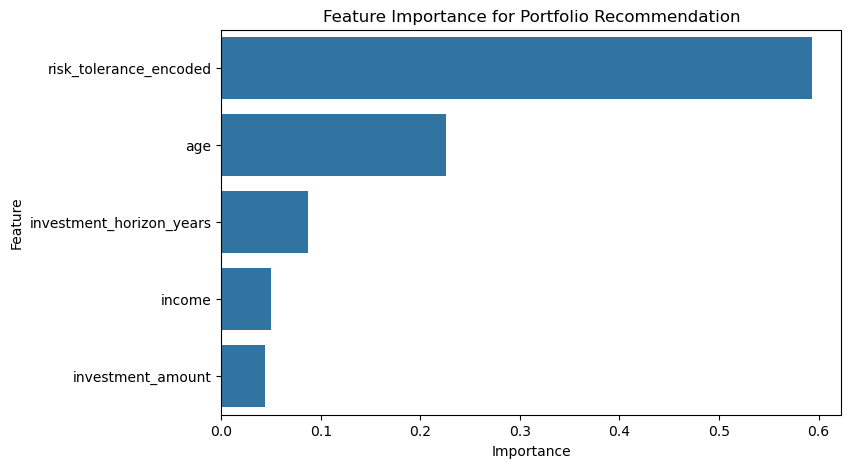

In [49]:
# Feature importance
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title("Feature Importance for Portfolio Recommendation")
plt.show()